This Jupyter notebook loads the raw amplitude and Mel spectrogram data files as numpy arrays.

Download the data files [here](https://console.cloud.google.com/storage/browser/cs181_practical_data).  This notebook assumes that the data files as located in the same directory.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.model_selection import GridSearchCV

### Load raw amplitude data.

In [2]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

In [3]:
X_amp_train.shape

(5553, 44100)

/Users/thupham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

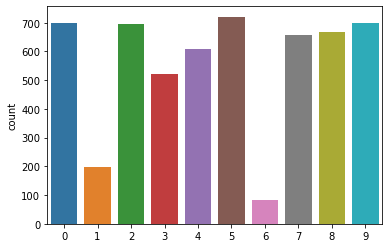

In [4]:
y_amp_train
sns.countplot(y_amp_train)

In [5]:
# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [6]:
X_amp_test.shape

(2197, 44100)

### Load Mel spectrogram data.

In [7]:
# Load train data
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [8]:
X_mel_train.shape

(5553, 128, 87)

In [9]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [10]:
# Load test data
X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [11]:
X_mel_test.shape

(2197, 128, 87)

In [12]:
# Flatten X_mel_test's spectrogram features
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

### Delete an object from local memory.

The "del" keyword in Python is used to dereference objects from local memory.  You can use it to save memory by getting rid of variables that you don't intend to use anymore.

For example, to delete the variable X_mel_train:

In [13]:
# del X_mel_train
# del X_mel_test

### Part A: Feature Engineering and Baseline Models

**Your task: Train the following two models.**

1. Perform PCA on the raw amplitude features (`Xtrain amp`, `Xtest amp`). Train a logistic regression model on the 500 most significant PCA components. This will be our first baseline model.

2. Perform PCA on the Mel spectrogram features (`Xtrain mel`, `Xtest mel`). Train a logistic regression model on the 500 most significant PCA components. This will be our second baseline model.

**Discuss which feature representation resulted in higher model performance, and why you hypothesize this feature representation performed better than the other. Also discuss why we might have asked you to perform PCA first and the impact of that choice.**

In [18]:
# run PCA for everything

pca = PCA(n_components=500)
X_amp_train_pca = pca.fit_transform(X_amp_train)
X_amp_test_pca = pca.transform(X_amp_test)

X_mel_train_flat_pca = pca.fit_transform(X_mel_train_flat)
X_mel_test_flat_pca = pca.transform(X_mel_test_flat)


0.60182005


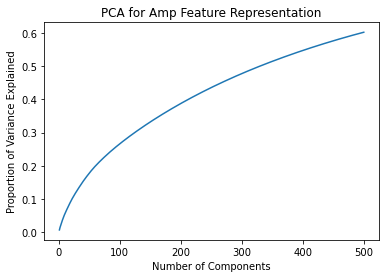

In [98]:
my_model = PCA(n_components=500)
my_model.fit_transform(X_amp_train)

print(my_model.explained_variance_ratio_.cumsum()[499])

plt.plot(np.arange(1, 501), my_model.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")
plt.title("PCA for Amp Feature Representation")
plt.savefig('pca_amp.png')

0.97920465


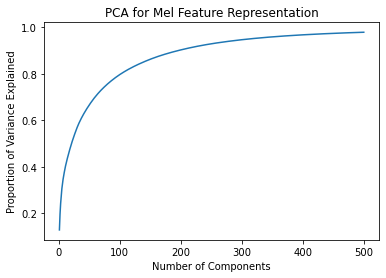

In [99]:
my_model = PCA(n_components=500)
my_model.fit_transform(X_mel_train_flat)

print(my_model.explained_variance_ratio_.cumsum()[499])

plt.plot(np.arange(1, 501), my_model.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")
plt.title("PCA for Mel Feature Representation")
plt.savefig('pca_mel.png')

In [19]:
# First Baseline Model

train_accuracies = []
test_accuracies = []
train_per_class_accuracies = []
test_per_class_accuracies = []

# create our PCA object that will calculate the first 500 principal components
pca = PCA(n_components=500)

# fit and transform our training data
X_amp_train_pca = pca.fit_transform(X_amp_train)

# train a logistic regression on the PCA transformed training data
# max_iter=1000 to get rid of covergence warnings
lr = LogisticRegression(max_iter=1000)
lr.fit(X_amp_train_pca, y_amp_train)

# make our train predictions
preds_amp_train_lr = lr.predict(X_amp_train_pca)

# transform our testing data
X_amp_test_pca = pca.transform(X_amp_test)

# make our test predictions
preds_amp_test_lr = lr.predict(X_amp_test_pca)

# calculate train and test accuracy
train_accuracies.append(accuracy_score(y_amp_train, preds_amp_train_lr))
test_accuracies.append(accuracy_score(y_amp_test, preds_amp_test_lr))

# confusion matrix
train_cfm = confusion_matrix(y_amp_train, preds_amp_train_lr)
test_cfm = confusion_matrix(y_amp_test, preds_amp_test_lr)

# calculate per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
train_per_class_accuracies.append(train_cfm.diagonal() / train_cfm.sum(axis=1))
test_per_class_accuracies.append(test_cfm.diagonal() / test_cfm.sum(axis=1))

print(f"[TRAIN ACCURACY] {np.mean(train_accuracies)}")
print(f"[TEST ACCURACY] Mean: {np.mean(test_accuracies)}")
print(f"[TRAIN PER-CLASS ACCURACY] Mean: {np.mean(train_per_class_accuracies, axis=0)}")
print(f"[TEST PER-CLASS ACCURACY] Mean: {np.mean(test_per_class_accuracies, axis=0)}")

[TRAIN ACCURACY] Mean: 0.41491085899513774; Standard Deviation: 0.0
[TEST ACCURACY] Mean: 0.20163859808830223; Standard Deviation: 0.0
[TRAIN PER-CLASS ACCURACY] Mean: [0.41857143 0.35025381 0.53448276 0.3040153  0.34266886 0.4479889
 0.61445783 0.4224924  0.41167665 0.39428571]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[TEST PER-CLASS ACCURACY] Mean: [0.23333333 0.02564103 0.59866221 0.07860262 0.10606061 0.16666667
 0.06666667 0.11016949 0.09745763 0.17333333]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# Second Baseline Model

train_accuracies = []
test_accuracies = []
train_per_class_accuracies = []
test_per_class_accuracies = []

# train a logistic regression on the PCA transformed training data
# solver='sag' and max_iter=10000 to get rid of covergence warnings
lr_pca = LogisticRegression(solver='sag', max_iter=10000)
lr_pca.fit(X_mel_train_flat_pca, y_mel_train)

# make our train predictions
preds_mel_train_lr_pca = lr_pca.predict(X_mel_train_flat_pca)

# make our test predictions
preds_mel_test_lr_pca = lr_pca.predict(X_mel_test_flat_pca)

# calculate train and test accuracy
train_accuracies.append(accuracy_score(y_mel_train, preds_mel_train_lr_pca))
test_accuracies.append(accuracy_score(y_mel_test, preds_mel_test_lr_pca))

# confusion matrix
train_cfm = confusion_matrix(y_mel_train, preds_mel_train_lr_pca)
test_cfm = confusion_matrix(y_mel_test, preds_mel_test_lr_pca)

# get per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
train_per_class_accuracies.append(train_cfm.diagonal() / train_cfm.sum(axis=1))
test_per_class_accuracies.append(test_cfm.diagonal() / test_cfm.sum(axis=1))

print(f"[TRAIN ACCURACY] Mean: {np.mean(train_accuracies)}")
print(f"[TEST ACCURACY] Mean: {np.mean(test_accuracies)}")
print(f"[TRAIN PER-CLASS ACCURACY] Mean: {np.mean(train_per_class_accuracies, axis=0)}")
print(f"[TEST PER-CLASS ACCURACY] Mean: {np.mean(test_per_class_accuracies, axis=0)}")

[TRAIN ACCURACY] Mean: 0.5258418872681433; Standard Deviation: 0.0
[TEST ACCURACY] Mean: 0.3304506144742831; Standard Deviation: 0.0
[TRAIN PER-CLASS ACCURACY] Mean: [0.51714286 0.45685279 0.81896552 0.4665392  0.41021417 0.45769764
 0.75903614 0.556231   0.49401198 0.45142857]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[TEST PER-CLASS ACCURACY] Mean: [0.22333333 0.38461538 0.82943144 0.20524017 0.31060606 0.28030303
 0.33333333 0.1059322  0.43220339 0.18666667]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Part B: More Modeling

Now, you will experiment with more expressive nonlinear model classes to maximize accuracy on the audio classification task. Examples of nonlinear models include random forests, KNN, and neural networks.

**B1: First Step**

First, we will be looking at simple models that are slightly more complicated than a linear
model.

**Your task: Train at least one nonlinear model on a feature representation of your choice. For model classes with hyperparameters, select a hyperparameter value you intuitively think is appropriate. Compare your results to the logistic regression models in Part A and discuss what your results imply about the task.**

In [72]:
# amp Random Forest

train_accuracies = []
test_accuracies = []
train_per_class_accuracies = []
test_per_class_accuracies = []

for i in range(5):

    # set seed
    np.random.seed(100 + 50 * i)

    # train a random forest on the PCA transformed training data
    model = RandomForestClassifier(max_depth=math.log(X_mel_train.shape[0]), n_jobs=-1)
    model.fit(X_amp_train_pca, y_amp_train)

    # make our train predictions
    preds_amp_train_rf = model.predict(X_amp_train_pca)

    # make our test predictions
    preds_amp_test_rf = model.predict(X_amp_test_pca)

    # calculate train and test accuracy
    train_accuracies.append(accuracy_score(y_amp_train, preds_amp_train_rf))
    test_accuracies.append(accuracy_score(y_amp_test, preds_amp_test_rf))

    # confusion matrix
    train_cfm = confusion_matrix(y_amp_train, preds_amp_train_rf)
    test_cfm = confusion_matrix(y_amp_test, preds_amp_test_rf)

    # get per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
    train_per_class_accuracies.append(train_cfm.diagonal() / train_cfm.sum(axis=1))
    test_per_class_accuracies.append(test_cfm.diagonal() / test_cfm.sum(axis=1))

print(f"[TRAIN ACCURACY] Mean: {np.mean(train_accuracies)}")
print(f"[TEST ACCURACY] Mean: {np.mean(test_accuracies)}")
print(f"[TRAIN PER-CLASS ACCURACY] Mean: {np.mean(train_per_class_accuracies, axis=0)}")
print(f"[TEST PER-CLASS ACCURACY] Mean: {np.mean(test_per_class_accuracies, axis=0)}")

[TRAIN ACCURACY] Mean: 0.5651719791103907; Standard Deviation: 0.0022043787139347437
[TEST ACCURACY] Mean: 0.24396904870277653; Standard Deviation: 0.0016028053583667763
[TRAIN PER-CLASS ACCURACY] Mean: [0.64057143 0.13299492 0.80287356 0.13652008 0.49258649 0.65991678
 0.54698795 0.7893617  0.36946108 0.63885714]; Standard Deviation: [0.01180107 0.00873333 0.01200035 0.00354632 0.00954951 0.00805872
 0.01228679 0.00354465 0.00495597 0.01350435]
[TEST PER-CLASS ACCURACY] Mean: [0.268      0.         0.83344482 0.         0.03484848 0.4219697
 0.02       0.21016949 0.00254237 0.11666667]; Standard Deviation: [0.0142361  0.         0.01086828 0.         0.00441739 0.01753915
 0.01632993 0.01216331 0.00207584 0.0101105 ]


In [73]:
# mel Random Forest

train_accuracies = []
test_accuracies = []
train_per_class_accuracies = []
test_per_class_accuracies = []

for i in range(5):

    # set seed
    np.random.seed(100 + 50 * i)

    # train a random forest on the PCA transformed training data
    model = RandomForestClassifier(max_depth=math.log(X_mel_train.shape[0]), n_jobs=-1)
    model.fit(X_mel_train_flat_pca, y_mel_train)

    # make our train predictions
    preds_mel_train_rf = model.predict(X_mel_train_flat_pca)

    # make our test predictions
    preds_mel_test_rf = model.predict(X_mel_test_flat_pca)

    # calculate train and test accuracy
    train_accuracies.append(accuracy_score(y_mel_train, preds_mel_train_rf))
    test_accuracies.append(accuracy_score(y_mel_test, preds_mel_test_rf))

    # confusion matrix
    train_cfm = confusion_matrix(y_mel_train, preds_mel_train_rf)
    test_cfm = confusion_matrix(y_mel_test, preds_mel_test_rf)

    # get per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
    train_per_class_accuracies.append(train_cfm.diagonal() / train_cfm.sum(axis=1))
    test_per_class_accuracies.append(test_cfm.diagonal() / test_cfm.sum(axis=1))

print(f"[TRAIN ACCURACY] Mean: {np.mean(train_accuracies)}")
print(f"[TEST ACCURACY] Mean: {np.mean(test_accuracies)}")
print(f"[TRAIN PER-CLASS ACCURACY] Mean: {np.mean(train_per_class_accuracies, axis=0)}")
print(f"[TEST PER-CLASS ACCURACY] Mean: {np.mean(test_per_class_accuracies, axis=0)}")

[TRAIN ACCURACY] Mean: 0.7724833423374753; Standard Deviation: 0.003926631851872855
[TEST ACCURACY] Mean: 0.3680473372781065; Standard Deviation: 0.005289336020513046
[TRAIN PER-CLASS ACCURACY] Mean: [0.87171429 0.40101523 0.80488506 0.64512428 0.70510708 0.85270458
 0.75180723 0.91519757 0.74520958 0.71085714]; Standard Deviation: [0.0069046  0.00556064 0.01057378 0.01163681 0.01026189 0.0077173
 0.00963855 0.00364742 0.01289165 0.00673704]
[TEST PER-CLASS ACCURACY] Mean: [0.144      0.06153846 0.60401338 0.2        0.26515152 0.38181818
 0.07333333 0.44576271 0.61610169 0.37666667]; Standard Deviation: [0.0159722  0.02051282 0.01396697 0.01840289 0.00987758 0.01055181
 0.01333333 0.01805701 0.0043212  0.0147573 ]


In [29]:
# amp KNN

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_amp_train_pca, y_amp_train)

# make our train predictions
preds_amp_train_knn = model.predict(X_amp_train_pca)

# make our test predictions
preds_amp_test_knn = model.predict(X_amp_test_pca)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_amp_train, preds_amp_train_knn)
test_accuracy = accuracy_score(y_amp_test, preds_amp_test_knn)

# confusion matrix
train_cfm = confusion_matrix(y_amp_train, preds_amp_train_knn)
test_cfm = confusion_matrix(y_amp_test, preds_amp_test_knn)

# get per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
train_per_class_accuracies = train_cfm.diagonal() / train_cfm.sum(axis=1)
test_per_class_accuracies = test_cfm.diagonal() / test_cfm.sum(axis=1)

print(f"[TRAIN ACCURACY] Mean: {train_accuracy}")
print(f"[TEST ACCURACY] Mean: {test_accuracy}")
print(f"[TRAIN PER-CLASS ACCURACY] {train_per_class_accuracies}")
print(f"[TEST PER-CLASS ACCURACY] {test_per_class_accuracies}")

[TRAIN ACCURACY] Mean: 0.3056005762650819; Standard Deviation: 0.0
[TEST ACCURACY] Mean: 0.17159763313609466; Standard Deviation: 0.0
[TRAIN PER-CLASS ACCURACY] Mean: [0.63857143 0.0964467  0.2816092  0.34416826 0.13014827 0.2926491
 0.12048193 0.14741641 0.5508982  0.12857143]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[TEST PER-CLASS ACCURACY] Mean: [0.4        0.         0.10367893 0.13537118 0.03787879 0.10984848
 0.03333333 0.         0.58898305 0.05333333]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
# mel KNN

# train a KNN model on the PCA transformed training data
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_mel_train_flat_pca, y_mel_train)

# make our train predictions
preds_mel_train_knn = model.predict(X_mel_train_flat_pca)

# make our test predictions
preds_mel_test_knn = model.predict(X_mel_test_flat_pca)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_mel_train, preds_mel_train_knn)
test_accuracy = accuracy_score(y_mel_test, preds_mel_test_knn)

# confusion matrix
train_cfm = confusion_matrix(y_mel_train, preds_mel_train_knn)
test_cfm = confusion_matrix(y_mel_test, preds_mel_test_knn)

# get per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
train_per_class_accuracies = train_cfm.diagonal() / train_cfm.sum(axis=1)
test_per_class_accuracies = test_cfm.diagonal() / test_cfm.sum(axis=1)

print(f"[TRAIN ACCURACY] {train_accuracy}")
print(f"[TEST ACCURACY] {test_accuracy}")
print(f"[TRAIN PER-CLASS ACCURACY] Mean: {train_per_class_accuracies}")
print(f"[TEST PER-CLASS ACCURACY] Mean: {test_per_class_accuracies}")

[TRAIN ACCURACY] Mean: 0.5804069872141185; Standard Deviation: 0.0
[TEST ACCURACY] Mean: 0.2598998634501593; Standard Deviation: 0.0
[TRAIN PER-CLASS ACCURACY] Mean: [0.81285714 0.50253807 0.43821839 0.34799235 0.6276771  0.86130374
 0.6626506  0.88601824 0.45958084 0.17285714]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[TEST PER-CLASS ACCURACY] Mean: [0.10333333 0.33333333 0.28093645 0.12227074 0.29924242 0.33333333
 0.33333333 0.67372881 0.27542373 0.04666667]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**B2: More Complicated Models–Hyperparameter Tuning and Validation**

In this section, you will explore hyperparameter tuning. Model hyperparameters such as network architecture or random forest maximum tree depth determine the expressivity of the model class. Training hyperparameters such as learning rate, weight decay, or regularization coefficients influence optimization and can encourage desirable properties (such as sparsity) in the final learned models.

Popular hyperparameter tuning techniques include random search, where you train a set of models with hyperparameters chosen uniformly at random from a set of possible values, and grid search, where all possible parameter values are considered exhaustively.

**Your task: Perform a hyperparameter search to maximize predictive accuracy for two model classes of your choice. You can choose which hyperparameters you search over (feel free to search over multiple simultaneously if you’d like!), but you must search over at least 5 possible values for at least 1 hyperparameter. Explore the changes in performance as you choose different hyperparameter values. In your writeup, discuss your validation strategy and your conclusions.**

Note: Choose how to present your results of your hyperparameter search in a way that best reflects how to communicate your conclusions.

In [83]:
# relevant hyperparameters:

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is
# split: Here we will vary the parameter from 10% to 100% of the samples (from article)
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

max_depth_search = [3, 8, 13, 18, None]
min_samples_split_search = [2, 3, 4, 5, 6]
n_estimators_search = [50, 100, 150, 200, 250]

grid_search = {'n_estimators': n_estimators_search,
                'max_depth': max_depth_search,
                'min_samples_split': min_samples_split_search}

In [86]:
# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
RFC = RandomForestClassifier(random_state=181)
RFC_CV = GridSearchCV(estimator=RFC, param_grid=grid_search, n_jobs=-1, cv=None, verbose=1)

RFC_CV.fit(X_amp_train_pca, y_amp_train)

# select our best model from the gridsearch
best_params = RFC_CV.best_params_
print(best_params)

train_accuracies = []
test_accuracies = []
train_per_class_accuracies = []
test_per_class_accuracies = []

for i in range(5):
    # set seed
    np.random.seed(100 + 50 * i)
    RFC_best = RandomForestClassifier(n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'], max_depth=best_params['max_depth'],
                                     random_state = 181)

    # fit it on our entire train data
    RFC_best.fit(X_amp_train_pca, y_amp_train)
    
    preds_best_amp_train_rf = RFC_best.predict(X_amp_train_pca)
    preds_best_amp_test_rf = RFC_best.predict(X_amp_test_pca)
    
    # train and test accuracy
    train_accuracies.append(accuracy_score(y_amp_train, preds_best_amp_train_rf))
    test_accuracies.append(accuracy_score(y_amp_test, preds_best_amp_test_rf))

    # confusion matrix
    train_cfm = confusion_matrix(y_amp_train, preds_best_amp_train_rf)
    test_cfm = confusion_matrix(y_mel_test, preds_best_amp_test_rf)

    # get per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
    train_per_class_accuracies.append(train_cfm.diagonal() / train_cfm.sum(axis=1))
    test_per_class_accuracies.append(test_cfm.diagonal() / test_cfm.sum(axis=1))


print(f"[TRAIN ACCURACY] Mean: {np.mean(train_accuracies)}")
print(f"[TEST ACCURACY] Mean: {np.mean(test_accuracies)}")
print(f"[TRAIN PER-CLASS ACCURACY] Mean: {np.mean(train_per_class_accuracies, axis=0)}")
print(f"[TEST PER-CLASS ACCURACY] Mean: {np.mean(test_per_class_accuracies, axis=0)}")

Fitting 5 folds for each of 125 candidates, totalling 625 fits
{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 250}
[TRAIN ACCURACY] Mean: 1.0; Standard Deviation: 0.0
[TEST ACCURACY] Mean: 0.270368684569868; Standard Deviation: 0.0
[TRAIN PER-CLASS ACCURACY] Mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[TEST PER-CLASS ACCURACY] Mean: [0.25666667 0.         0.72575251 0.01310044 0.10984848 0.48106061
 0.03333333 0.21186441 0.18644068 0.15333333]; Standard Deviation: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.38777878e-17 0.00000000e+00 0.00000000e+00 2.77555756e-17
 0.00000000e+00 0.00000000e+00]


In [87]:
RFC = RandomForestClassifier(random_state=181)
RFC_CV = GridSearchCV(estimator=RFC, param_grid=grid_search, n_jobs=-1, cv=None, verbose=1)

RFC_CV.fit(X_mel_train_flat_pca, y_mel_train)

# select our best model from the gridsearch
best_params = RFC_CV.best_params_
print(best_params)
train_accuracies = []
test_accuracies = []
train_per_class_accuracies = []
test_per_class_accuracies = []

for i in range(5):
    # set seed
    np.random.seed(100 + 50 * i)
    RFC_best = RandomForestClassifier(n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'], max_depth=best_params['max_depth'],
                                     random_state = 181)

    # fit it on our entire train data
    RFC_best.fit(X_mel_train_flat_pca, y_mel_train)
    
    preds_best_mel_train_rf = RFC_best.predict(X_mel_train_flat_pca)
    preds_best_mel_test_rf = RFC_best.predict(X_mel_test_flat_pca)
    
    # train and test accuracy
    train_accuracies.append(accuracy_score(y_mel_train, preds_best_mel_train_rf))
    test_accuracies.append(accuracy_score(y_mel_test, preds_best_mel_test_rf))

    # confusion matrix
    train_cfm = confusion_matrix(y_mel_train, preds_best_mel_train_rf)
    test_cfm = confusion_matrix(y_mel_test, preds_best_mel_test_rf)

    # get per-class classification accuracy (https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
    train_per_class_accuracies.append(train_cfm.diagonal() / train_cfm.sum(axis=1))
    test_per_class_accuracies.append(test_cfm.diagonal() / test_cfm.sum(axis=1))


print(f"[TRAIN ACCURACY] Mean: {np.mean(train_accuracies)}")
print(f"[TEST ACCURACY] Mean: {np.mean(test_accuracies)}")
print(f"[TRAIN PER-CLASS ACCURACY] Mean: {np.mean(train_per_class_accuracies, axis=0)}")
print(f"[TEST PER-CLASS ACCURACY] Mean: {np.mean(test_per_class_accuracies, axis=0)}")

Fitting 5 folds for each of 125 candidates, totalling 625 fits
{'max_depth': 18, 'min_samples_split': 2, 'n_estimators': 250}
[TRAIN ACCURACY] Mean: 1.0; Standard Deviation: 0.0
[TEST ACCURACY] Mean: 0.40873918980427854; Standard Deviation: 0.0
[TRAIN PER-CLASS ACCURACY] Mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]; Standard Deviation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[TEST PER-CLASS ACCURACY] Mean: [0.19333333 0.17948718 0.59531773 0.23580786 0.31060606 0.39393939
 0.06666667 0.53389831 0.66525424 0.43333333]; Standard Deviation: [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.77555756e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.55111512e-17]


In [69]:
# amp KNN Grid Search

# these are the settings that we will tune: 'n_neighbors'
param_grid = {'n_neighbors': np.arange(1, 28, 2),}

# instantiate our template model
KNN = KNeighborsClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
KNN_CV = GridSearchCV(estimator=KNN, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
KNN_CV.fit(X_amp_train_pca, y_amp_train)

# print the best results
print(KNN_CV.best_params_)

# select our best model from the gridsearch
best_params = KNN_CV.best_params_
KNN_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

# fit it on our entire train data
KNN_best.fit(X_amp_train, y_amp_train)

# make our train predictions
preds_amp_train_knn_best = KNN_best.predict(X_amp_train)

# make our test predictions
preds_amp_test_knn_best = KNN_best.predict(X_amp_test)

train_cfm = confusion_matrix(y_amp_train, preds_amp_train_knn_best)
test_cfm = confusion_matrix(y_amp_test, preds_amp_test_knn_best)

print(f"Train Accuracy: {accuracy_score(y_amp_train, preds_amp_train_knn_best)}")
print(f"Per-Class Train Accuracy {train_cfm.diagonal() / train_cfm.sum(axis=1)}")
print(f"Test Accuracy: {accuracy_score(y_amp_test, preds_amp_test_knn_best)}")
print(f"Per-Class Test Accuracy {test_cfm.diagonal() / test_cfm.sum(axis=1)}")


Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'n_neighbors': 1}
Train Accuracy: 1.0
Per-Class Train Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test Accuracy: 0.19754210286754664
Per-Class Test Accuracy [0.13666667 0.         0.2006689  0.21834061 0.00757576 0.34469697
 0.06666667 0.00423729 0.71186441 0.06333333]


In [ ]:
#### mel KNN Grid Search

# these are the settings that we will tune: 'n_neighbors'
param_grid = {'n_neighbors': np.arange(1, 28, 2),}

# instantiate our template model
KNN = KNeighborsClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
KNN_CV = GridSearchCV(estimator=KNN, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
KNN_CV.fit(X_mel_train_flat_pca, y_mel_train)

# print the best results
print(KNN_CV.best_params_)

# select our best model from the gridsearch
best_params = KNN_CV.best_params_
KNN_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

# fit it on our entire train data
KNN_best.fit(X_mel_train_flat_pca, y_mel_train)

# make our train predictions
preds_mel_train_knn_best = KNN_best.predict(X_mel_train_flat_pca)

# make our test predictions
preds_mel_test_knn_best = KNN_best.predict(X_mel_test_flat_pca)

train_cfm = confusion_matrix(y_mel_train, preds_mel_train_knn_best)
test_cfm = confusion_matrix(y_mel_test, preds_mel_test_knn_best)

print(f"Train Accuracy: {accuracy_score(y_mel_train, preds_mel_train_knn_best)}")
print(f"Per-Class Train Accuracy {train_cfm.diagonal() / train_cfm.sum(axis=1)}")
print(f"Test Accuracy: {accuracy_score(y_mel_test, preds_mel_test_knn_best)}")
print(f"Per-Class Test Accuracy {test_cfm.diagonal() / test_cfm.sum(axis=1)}")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1b5e2bb3-566b-4513-989d-4151b916dec0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>